In [1]:

# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Replace the following with your database configuration
db_config = {
   "dbname": "postgres",
    "user": "postgres",
    "password": "finalproject",
    "host": "database-1.cxqtmtcu0z5m.us-east-1.rds.amazonaws.com",
    "port": "5432"  # Default is 5432 for PostgreSQL
}

#Connect to the PostgreSQL database

engine = create_engine(f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

#Load data from the ev_registration_giga table into a pandas DataFrame
query = "SELECT * FROM ev_registration_gigas;"
df1 = pd.read_sql_query(query, engine)

In [3]:
#df1 = pd.read_csv("C:\\Users\\LSchu\\Documents\\Class\\Final Project\\Final Project\\EV_Data.csv")

In [4]:
print(df1.head())
print(df1.columns)

  state  year  electric_ev  plug_in_hybrid_electric_phev  \
0    ID  2021       3500.0                        2500.0   
1    IL  2021      36500.0                       18300.0   
2    IN  2021      10400.0                        7500.0   
3    IA  2021       3700.0                        3600.0   
4    KS  2021       4500.0                        3300.0   

   charging_station_count  income  education  population  non_ev_total  \
0                   282.0   76918      0.307     1904314       1875700   
1                  1792.0   79253      0.371    12686469       9913300   
2                   606.0   70190      0.289     6813532       6018200   
3                   492.0   72429      0.305     3197689       3043800   
4                   910.0   75979      0.354     2937922       2565100   

   ev_total  
0      6000  
1     54800  
2     17900  
3      7300  
4      7800  
Index(['state', 'year', 'electric_ev', 'plug_in_hybrid_electric_phev',
       'charging_station_count', 'incom

In [5]:
df = df1.drop(['state', 'electric_ev', 'plug_in_hybrid_electric_phev', 'charging_station_count'], axis= 1)
print(df)

     year  income  education  population  non_ev_total  ev_total
0    2021   76918      0.307     1904314       1875700      6000
1    2021   79253      0.371    12686469       9913300     54800
2    2021   70190      0.289     6813532       6018200     17900
3    2021   72429      0.305     3197689       3043800      7300
4    2021   75979      0.354     2937922       2565100      7800
..    ...     ...        ...         ...           ...       ...
301  2016   80268      0.381     8410106       7331000      7300
302  2016   87648      0.351     7294771       6073200     21300
303  2016   46836      0.208     1831023       1502400       400
304  2016   69943      0.295     5772628       5310200      5200
305  2016   71052      0.271      584215        591200       200

[306 rows x 6 columns]


In [6]:
X = df.drop('ev_total',axis= 1)
y = df['ev_total']
print(X)
print(y)

     year  income  education  population  non_ev_total
0    2021   76918      0.307     1904314       1875700
1    2021   79253      0.371    12686469       9913300
2    2021   70190      0.289     6813532       6018200
3    2021   72429      0.305     3197689       3043800
4    2021   75979      0.354     2937922       2565100
..    ...     ...        ...         ...           ...
301  2016   80268      0.381     8410106       7331000
302  2016   87648      0.351     7294771       6073200
303  2016   46836      0.208     1831023       1502400
304  2016   69943      0.295     5772628       5310200
305  2016   71052      0.271      584215        591200

[306 rows x 5 columns]
0       6000
1      54800
2      17900
3       7300
4       7800
       ...  
301     7300
302    21300
303      400
304     5200
305      200
Name: ev_total, Length: 306, dtype: int64


In [7]:
# creating train and test sets
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, shuffle = True)

train_index = X.year==2021
X_train = X.loc[~train_index]
X_test = X.loc[train_index]
y_train = y.loc[~train_index]
y_test = y.loc[train_index]

In [8]:
# creating a regression model
model = LinearRegression()

In [9]:
# fitting the model
model.fit(X_train,y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5894207936808619
Testing Score: 0.5775005368657995


In [10]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f'Min X Value: {x_min}')
print(f'Max X Value: {x_max}')

Min X Value: [[[2.0160e+03 4.6159e+04 2.0200e-01 0.0000e+00 3.1070e+05]]]
Max X Value: [[[2.0210000e+03 1.0128300e+05 6.3600000e-01 3.9512223e+07 3.4111700e+07]]]


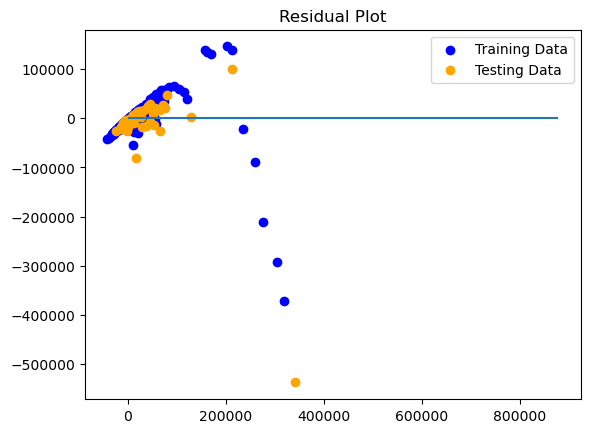

In [11]:
#plot residuals

plt.scatter(model.predict(X_train), model.predict(X_train)-y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [12]:
# making predictions
predictions = model.predict(X_test)
print(predictions)

[ 11563.37819578  75561.68642491  46040.81138268  19415.6842378
  12532.5138955   10330.10052785   6591.37764432  -6523.54447539
  50992.17174987  36745.44752767  55402.52957771  44324.03958733
  -9837.92323202  32893.20933484 -15028.2920024   10788.23810725
  -1374.13931758  13252.34887172  53187.3509943  -15483.36287126
  16057.6808833   57403.01307786 -10470.82154165  80503.23609135
  22324.7743608   29147.89451528  72394.21186124  -7624.36545235
  26836.50330532  -3222.53662364  38655.5339746  212364.79946818
  27118.30116963 -11832.37771953  64619.53241658  65638.28711308
 -25024.4657231   41874.52080989  -9373.38719789  22250.8185567
  -4800.30501772  -2337.4781459   44824.26694562  -7550.06988363
 341410.33756302  45776.32341969  12796.39154092 -12125.95993365
 129776.1897537   64577.8963501    1012.87293723]


In [13]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  6252853592.8166275
mean_absolute_error :  27925.482282963163
